In [1]:
import matplotlib.pyplot as plt
from numpy import matlib
import numpy as np
import pickle

In [2]:
def getBestClustering(ClusterResults):

    BestClustering = ClusterResults[0]
    for Resulti in ClusterResults:
        if(Resulti["SSE"] < BestClustering["SSE"]): BestClustering=Resulti    
    
    return BestClustering

def plot_shintetic(dataset,families,dimensions):
    
    colors = ["red","green","orange","cyan"]
    
    for i in range(families):
        ne = 0
        print("Family %d"%i)
        for dimension in range(dimensions):
            fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,3))
            for j in range(len(dataset)):
                if(j%families==i):
                    axes.plot([v for v in dataset[j][dimension]], color = colors[i],linewidth=0.1)
            axes.set_xlabel("Time [ms]",fontsize=14)
            axes.set_xlim(0,50)
            axes.set_ylim(-1.5,1.5)
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
            axes.set_ylabel("Value",fontsize=14)
            plt.tight_layout()
            plt.savefig("fig/family_%d_%d.pdf"%(i,dimension))
            plt.show()
            plt.close()  
            
            
def plot_results(dataset,Results,nclusters,ClusterAlgo):
       
    
    BestClustering = getBestClustering(Results[nclusters])
    labels = BestClustering["labels"]
    centroids = BestClustering["centroids"]
    
    colors = ["red","green","orange","cyan"]
    
    for i in range(nclusters):
        ne = 0
        for l in labels:
            if(l==i): ne+=1
        print("Cluster %d: %d"%(i,ne))
        for dimension in range(2):
            fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,3))
            for j in range(len(dataset)):
                if(i==labels[j]):
                    axes.plot([v for v in dataset[j][dimension]], color=colors[j%nclusters],alpha=0.1)
                            

            axes.plot(centroids[i][dimension],color="k")
            axes.set_xlabel("Time [ms]")
            axes.set_xlim(0,50)
            axes.set_ylim(-1.5,1.5)
            axes.set_ylabel("Value",fontsize=14)
            plt.tight_layout()
            plt.savefig("fig/%s_%d_%d.pdf"%(ClusterAlgo,i,dimension))
            plt.show()
            plt.close()

In [3]:
def plot_Curve(x,KMDTSC,kShape,xmin,xmax,ymin,ymax,xlabel,ylabel,figname,xticks=[]):
    
    fig, ax = plt.subplots(figsize=(6,2.5))

    ax.plot(x,kShape,color="r",label="k-Shape")
    ax.plot(x,KMDTSC,color="b",label="K-MDTSC")

    if(len(xticks)>0):
        plt.xticks(xticks)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)

    plt.xlabel(xlabel, fontsize = 14)
    plt.ylabel(ylabel, fontsize = 14)
       
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)

    plt.legend(fontsize=14)
    plt.grid()

    plt.tight_layout()
    plt.savefig("fig/%s.pdf"%figname) 
    plt.show()
    plt.close()
    
    return

In [11]:
KMDTSC_baseline = pickle.load(open("result/KMDTSC_Synthetic.pkl","rb")) 
kShape_baseline = pickle.load(open("result/kShape_Synthetic.pkl","rb")) 
Datasets_baseline = pickle.load(open("result/Dataset_Synthetic.pkl","rb"))

Family 0


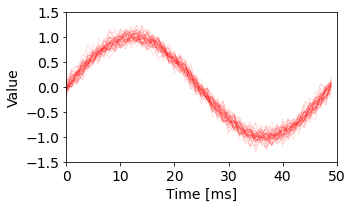

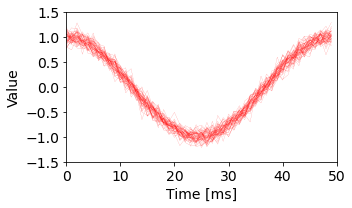

Family 1


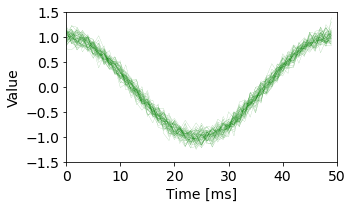

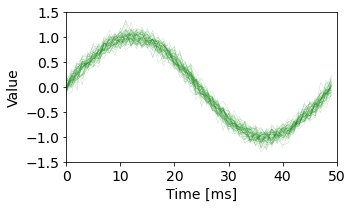

Family 2


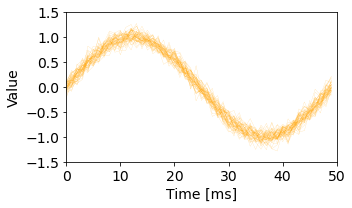

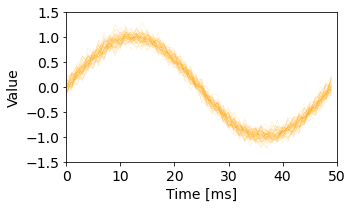

Family 3


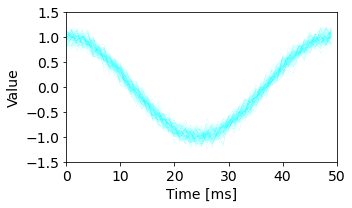

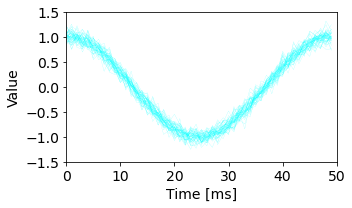

Cluster 0: 50


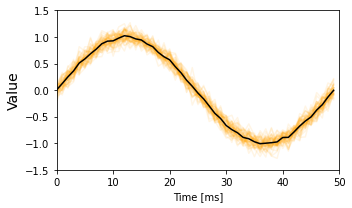

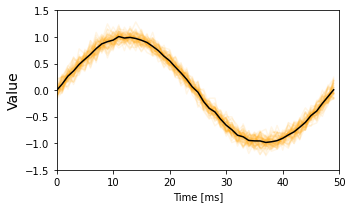

Cluster 1: 50


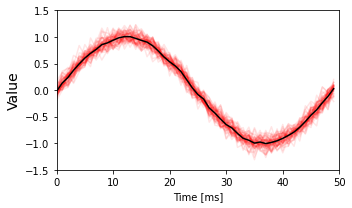

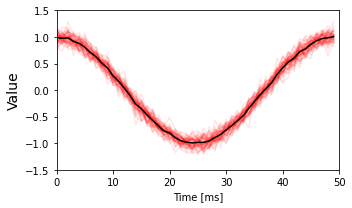

Cluster 2: 50


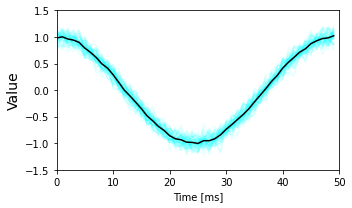

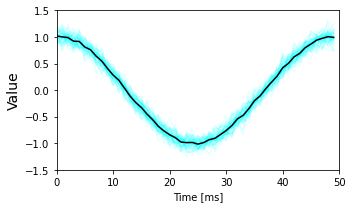

Cluster 3: 50


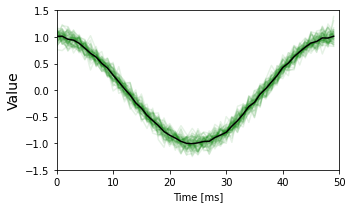

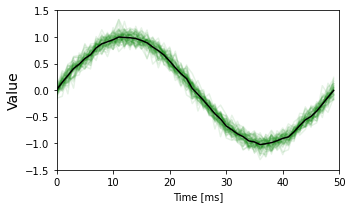

Cluster 0: 50


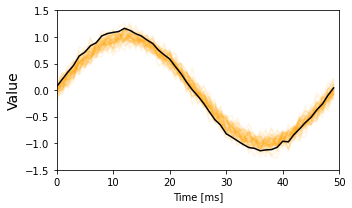

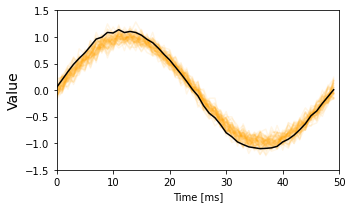

Cluster 1: 50


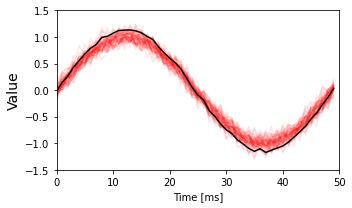

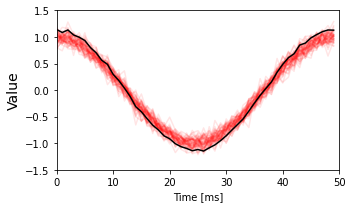

Cluster 2: 50


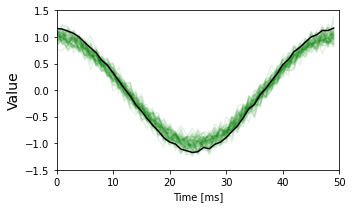

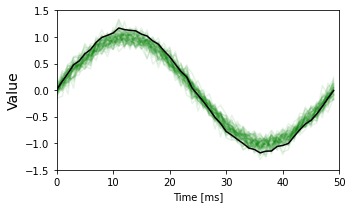

Cluster 3: 50


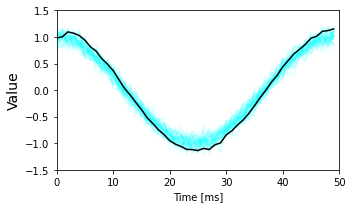

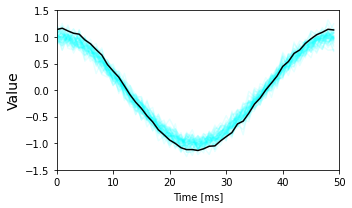

In [13]:
plot_shintetic(Datasets_baseline,4,2)
plot_results(Datasets_baseline,KMDTSC_baseline,4,"K-MDTSC")
plot_results(Datasets_baseline,kShape_baseline,4,"kshape")

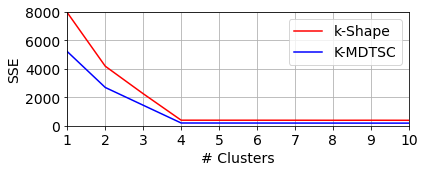

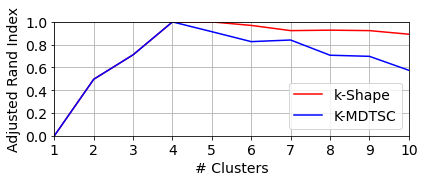

In [14]:
KMDTSC_SSE = [getBestClustering(KMDTSC_baseline[nc])["SSE"] for nc in range(1,11)]
kShape_SSE = [getBestClustering(kShape_baseline[nc])["SSE"] for nc in range(1,11)]
x = [i for i in range(1,11)]

plot_Curve(x,KMDTSC_SSE,kShape_SSE,1,10,0,8000,"# Clusters","SSE","SSE_shintetic")

KMDTSC_RandIndex = [getBestClustering(KMDTSC_baseline[nc])["RandIndex"] for nc in range(1,11)]
kShape_RandIndex = [getBestClustering(kShape_baseline[nc])["RandIndex"] for nc in range(1,11)]
plot_Curve(x,KMDTSC_RandIndex,kShape_RandIndex,1,10,0,1,"# Clusters","Adjusted Rand Index","Rand_shintetic")

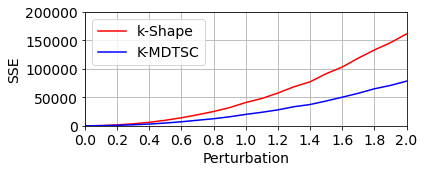

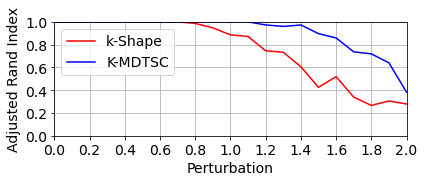

In [15]:
KMDTSC = pickle.load(open("result/KMDTSC_Perturbation.pkl","rb")) 
kShape = pickle.load(open("result/kShape_Perturbation.pkl","rb")) 
Datasets = pickle.load(open("result/Datasets_Perturbation.pkl","rb"))

x = [noisei for noisei in np.arange(0,2.1,0.1).round(decimals=1)]

KMDTSC_SSE = [getBestClustering(KMDTSC[xi][4])["SSE"] for xi in x]
kShape_SSE = [getBestClustering(kShape[xi][4])["SSE"] for xi in x]

plot_Curve(x,KMDTSC_SSE,kShape_SSE,0,2,0,200000,"Perturbation","SSE","SSE_perturbation",[noisei for noisei in np.arange(0,2.1,0.2).round(decimals=1)])

KMDTSC_RandIndex = [getBestClustering(KMDTSC[xi][4])["RandIndex"] for xi in x]
kShape_RandIndex = [getBestClustering(kShape[xi][4])["RandIndex"] for xi in x]


plot_Curve(x,KMDTSC_RandIndex,kShape_RandIndex,0,2,0,1,"Perturbation","Adjusted Rand Index","Rand_perturbation",[noisei for noisei in np.arange(0,2.1,0.2).round(decimals=1)])

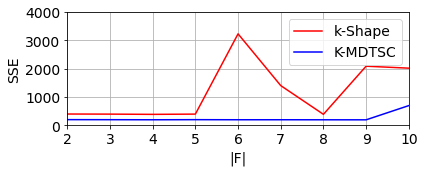

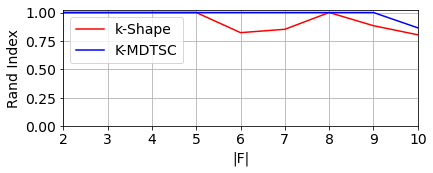

In [16]:
KMDTSC = pickle.load(open("result/KMDTSC_Family.pkl","rb")) 
kShape = pickle.load(open("result/kShape_Family.pkl","rb")) 
Datasets = pickle.load(open("result/Datasets_Family.pkl","rb"))

x = [familyi for familyi in range(2,11)]

KMDTSC_SSE = [getBestClustering(KMDTSC[xi][xi])["SSE"] for xi in x]
kShape_SSE = [getBestClustering(kShape[xi][xi])["SSE"] for xi in x]

plot_Curve(x,KMDTSC_SSE,kShape_SSE,2,10,0,4000,"|F|","SSE","SSE_family")
KMDTSC_RandIndex = [getBestClustering(KMDTSC[xi][xi])["RandIndex"] for xi in x]
kShape_RandIndex = [getBestClustering(kShape[xi][xi])["RandIndex"] for xi in x]


plot_Curve(x,KMDTSC_RandIndex,kShape_RandIndex,2,10,0,1.02,"|F|","Rand Index","Rand_family")

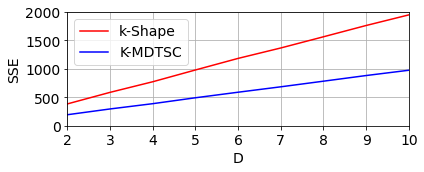

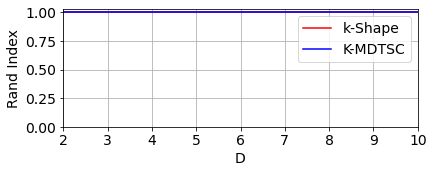

In [18]:
KMDTSC = pickle.load(open("result/KMDTSC_Dimension.pkl","rb")) 
kShape = pickle.load(open("result/kShape_Dimension.pkl","rb")) 
Datasets = pickle.load(open("result/Datasets_Dimension.pkl","rb"))

x = [familyi for familyi in range(2,11)]

KMDTSC_SSE = [getBestClustering(KMDTSC[xi][4])["SSE"] for xi in x]
kShape_SSE = [getBestClustering(kShape[xi][4])["SSE"] for xi in x]

plot_Curve(x,KMDTSC_SSE,kShape_SSE,2,10,0,2000,"D","SSE","SSE_dimension")
KMDTSC_RandIndex = [getBestClustering(KMDTSC[xi][4])["RandIndex"] for xi in x]
kShape_RandIndex = [getBestClustering(kShape[xi][4])["RandIndex"] for xi in x]


plot_Curve(x,KMDTSC_RandIndex,kShape_RandIndex,2,10,0,1.03,"D","Rand Index","Rand_dimension")